In [110]:
import tensorflow as tf
import os
import matplotlib.pyplot as plt
import numpy as np

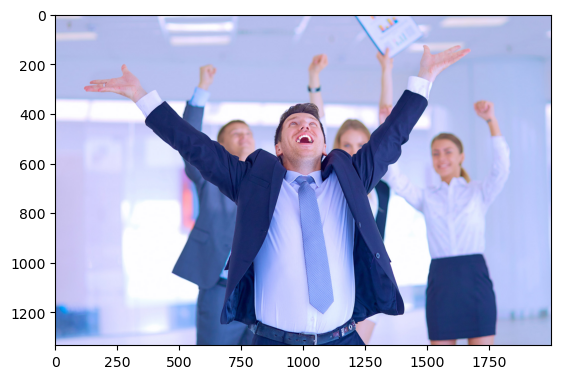

In [47]:
img = cv.imread(os.path.join('data', 'happy', '170404-happy-workers-feature.jpg'))
plt.imshow(cv.cvtColor(img , cv.COLOR_BGR2RGB))
plt.show()

In [3]:
# Avoid OOM errors by setting GPU Memory Consumption Growth
gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

In [4]:
gpus = tf.config.experimental.list_physical_devices('GPU')
gpus

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [20]:
data_dir = 'data2'

In [21]:
os.path.join(data_dir, 'image_class')

'data2\\image_class'

In [43]:
image_files = ['jpeg','jpg', 'bmp', 'png']

In [44]:
for image_class in os.listdir(data_dir): # Coconuts and Capyabras
    for image in os.listdir(os.path.join(data_dir, image_class)): # Images in each folder
        image_path = os.path.join(data_dir, image_class, image)
#         print(image_path)
        try:
            img = cv.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not in image_files:
                print(f'Image is not in image_files list {image_path}')
                os.remove(image_path)
        except Exception as e:
#             print(e)
            print('Issued with this image', image_path)

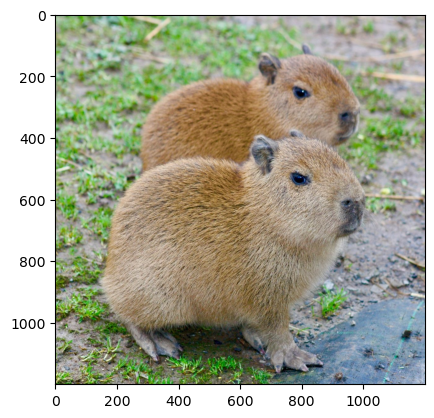

In [3]:
# img = cv.imread(os.path.join('data2', 'capybara', 'a.jpg'))
# plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
# plt.show()
# plt.imshow(img)

In [72]:
data = tf.keras.utils.image_dataset_from_directory('data2')

Found 394 files belonging to 2 classes.


In [73]:
data_iterator = data.as_numpy_iterator() # iterator object (.as_numpy_iterator() makes it iterable)

In [80]:
batch = data_iterator.next()

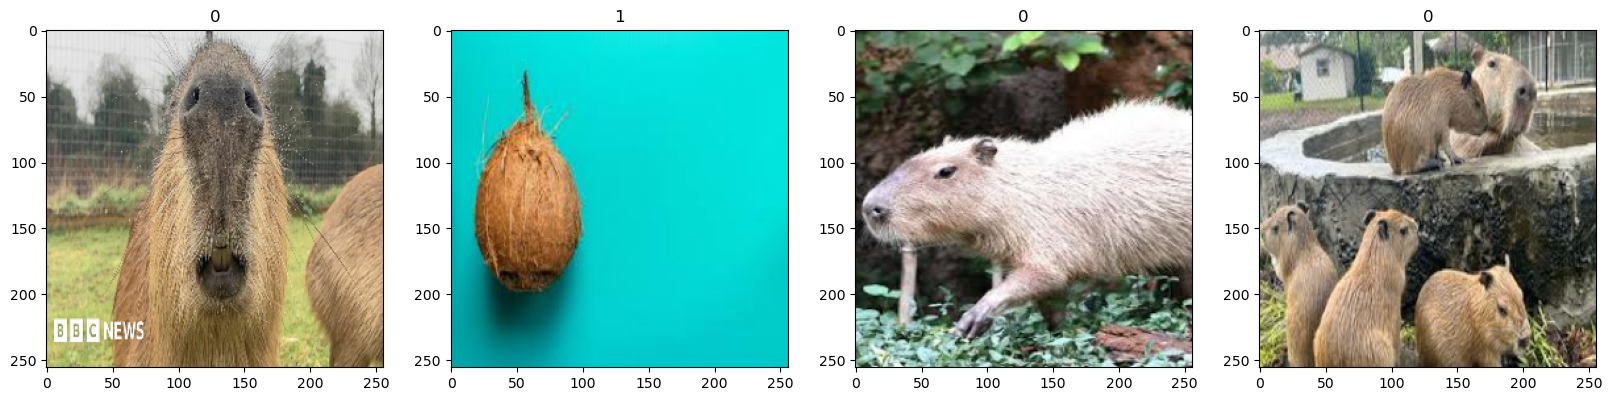

In [81]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int)) # imshow() is a matplotlib function which requires image data format to be integer or float
    ax[index].title.set_text(batch[1][index])

In [76]:
data = data.map(lambda x, y: (x/255, y)) # reduces image size as it is easy and fast for model to learn

# Scale data

In [83]:
# data.as_numpy_iterator().next()[0].shape
data.as_numpy_iterator().next()[0].max()

1.0

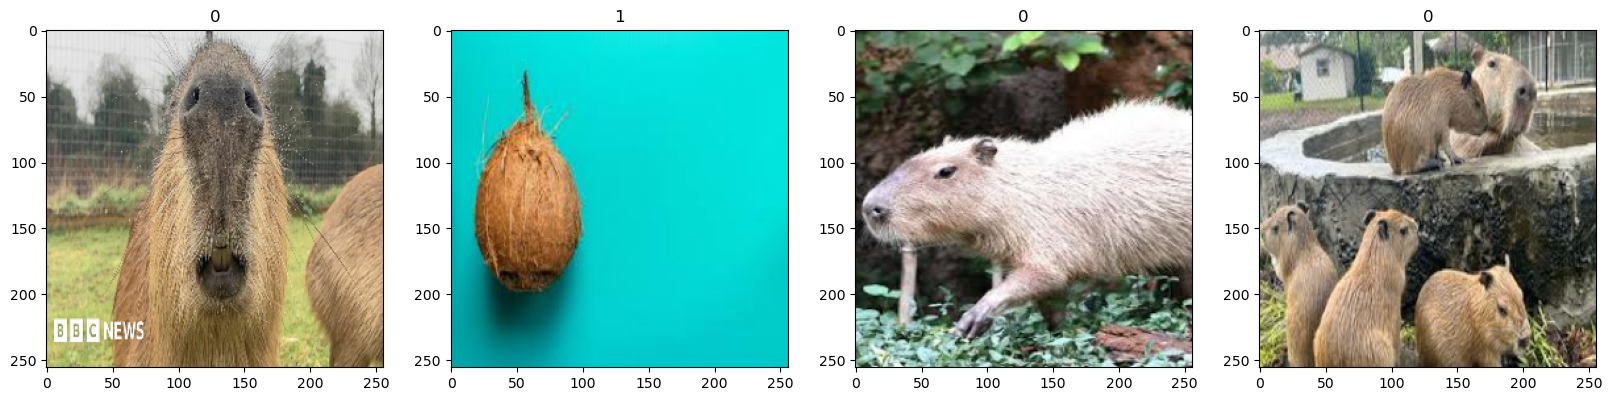

In [84]:
fig, ax = plt.subplots(ncols=4, figsize=(20, 20))
for index, img in enumerate(batch[0][:4]):
    ax[index].imshow(img.astype(int)) # imshow() is a matplotlib function which requires image data format to be integer or float
    ax[index].title.set_text(batch[1][index])

# Split data

In [86]:
len(data) # number of batch

13

In [100]:
train_size = int((len(data)*0.7))
val_size = int((len(data)*0.3)) # validate ตรวจสอบความถูกต้อง
test_size = int((len(data)*0.1))

In [101]:
train_size+val_size+test_size

13

# allocate data

In [108]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + test_size).take(test_size)

# Build Deep Learning Model

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout